In [2]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# STEP 1: Import Required Libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# STEP 2: Define the Function to Estimate Severity
def estimate_severity(img_path):
    # Step 2.1: Load the image
    img = cv2.imread(img_path)

    # Resize image to 224x224 for consistency
    img = cv2.resize(img, (224, 224))

    # Convert to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Step 2.2: Masking green leaf area (healthy region)
    lower_green = np.array([25, 40, 40])  # Define lower bound for green
    upper_green = np.array([90, 255, 255])  # Define upper bound for green
    leaf_mask = cv2.inRange(hsv, lower_green, upper_green)

    # Step 2.3: Masking brown/yellowish (diseased region)
    lower_brown = np.array([10, 50, 50])  # Lower bound for diseased regions
    upper_brown = np.array([30, 255, 255])  # Upper bound for diseased regions
    disease_mask = cv2.inRange(hsv, lower_brown, upper_brown)

    # Step 2.4: Calculate only diseased pixels within the leaf
    disease_in_leaf = cv2.bitwise_and(disease_mask, disease_mask, mask=leaf_mask)

    # Step 2.5: Calculate total leaf area and diseased area
    total_leaf = np.count_nonzero(leaf_mask)
    diseased_area = np.count_nonzero(disease_in_leaf)

    # Step 2.6: Handle case where no leaf pixels are detected
    if total_leaf == 0:
        print("No leaf detected in the image.")
        return 0  # No leaf detected

    # Step 2.7: Calculate severity as the ratio of diseased area to total leaf area
    severity = diseased_area / total_leaf
    print(f"🔬 Estimated Severity: {severity:.2%}")

    # Step 2.8: Optional: Display the original image, leaf mask, and disease mask
    plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original')
    plt.subplot(1, 3, 2), plt.imshow(leaf_mask, cmap='gray'), plt.title('Leaf Mask')
    plt.subplot(1, 3, 3), plt.imshow(disease_in_leaf, cmap='hot'), plt.title('Disease Mask')
    plt.tight_layout()
    plt.show()

    # Step 2.9: Return the severity value
    return severity


🔬 Estimated Severity: 76.62%


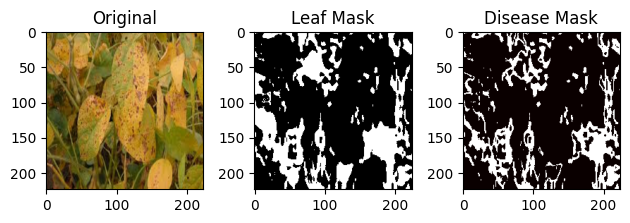

In [6]:
# STEP 3: Test the Function with a Sample Image
image_path = '/content/drive/MyDrive/Testing/septoria.jpeg'  # Replace with the path to your image
severity = estimate_severity(image_path)